In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import missingno as msno

In [ ]:
#load the data
!gdown 126QEYAd90InzPY5p3_nxAbTww7geFIy1

Downloading...
From: https://drive.google.com/uc?id=126QEYAd90InzPY5p3_nxAbTww7geFIy1
To: /content/CaseStudy-AlumniData.xlsx
100% 13.2k/13.2k [00:00<00:00, 36.8MB/s]


In [ ]:
file = '/content/CaseStudy-AlumniData.xlsx'
df = pd.read_excel(file)
df.head()

,Alumni-ID,Timestamp,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):
0,1,2023-07-25 09:55:00,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,Guru Kelas,Universitas Terbuka,Pendidikan Guru Sekolah Dasar,NaN,NaN,3.0,3.0,4.0
1,2,2023-07-26 10:10:00,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0
2,3,2023-07-28 02:00:00,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,Dosen,S2 UI dan S3 IPB,Magister Teknologi Informasi dan Doktoral Ilmu...,NaN,NaN,5.0,5.0,5.0
3,4,2023-07-27 14:27:00,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,Officer HC Solution Analysis Support,NaN,NaN,NaN,NaN,3.0,3.0,8.0
4,5,2023-07-25 09:44:00,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,Control Tower,ITS - Surabaya,Supply Chain,NaN,NaN,4.0,3.0,15.0


# PREPROCESSING

In [ ]:
#mengecek informasi pada data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 15 columns):
 #   Column                                                                                        Non-Null Count  Dtype         
---  ------                                                                                        --------------  -----         
 0   Alumni-ID                                                                                     210 non-null    int64         
 1   Timestamp                                                                                     110 non-null    datetime64[ns]
 2   Tahun Masuk                                                                                   110 non-null    float64       
 3   Tahun Wisuda                                                                                  110 non-null    float64       
 4   Status saat ini:                                                                              110 non-null    

Perlu diatasi:
- Masih terdapat beberapa variabel dengan tipe data yang tidak seharusnya
- Missing values juga terlihat banyak pada beberapa variabel
- Terdapat 210 Alumni-ID sedangkan hanya ada 110 responden yang mengisi survei

In [ ]:
#delete timestamp karena hanya menyatakan waktu submit form (kurang insightful)
del df['Timestamp']

In [ ]:
#akan dipakai 110 data pertama saja
df = df[:110]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 14 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Alumni-ID                                                                                     110 non-null    int64  
 1   Tahun Masuk                                                                                   110 non-null    float64
 2   Tahun Wisuda                                                                                  110 non-null    float64
 3   Status saat ini:                                                                              110 non-null    object 
 4   Waktu Mendapatkan Pekerjaan:                                                                  110 non-null    object 
 5   Tahun masuk saat anda melanju

In [ ]:
#mengecek duplikasi
df.duplicated().sum()

0

In [ ]:
#terdapat beberapa rows dengan nilai "-" yang seharusnya tidak perlu diisi sehingga bernilai NaN
df = df.applymap(lambda x: np.nan if x == '-' else x)

In [ ]:
#standarisasi dengan mengubah ke lower case
df['Nama Universitas dan Kota tempat melanjutkan Studi setelah S1'] = df['Nama Universitas dan Kota tempat melanjutkan Studi setelah S1'].str.lower()
df['Nama jurusan/program studi setelah S1'] = df['Nama jurusan/program studi setelah S1'].str.lower()
df['Posisi anda saat ini di tempat bekerja saat Ini:'] = df['Posisi anda saat ini di tempat bekerja saat Ini:'].str.lower()
df['Bidang wirausaha:'] = df['Bidang wirausaha:'].str.lower()

Selanjutnya, akan dibuat beberapa variabel baru yang nantinya akan mempermudah untuk mendapatkan insight

In [ ]:
#membuat variabel baru "lama studi S1 (tahun)" untuk dilakukan analisis nantinya
# lama studi = tahun wisuda - tahun masuk
df["lama studi S1 (tahun)"] =df["Tahun Wisuda"] - df["Tahun Masuk"]

In [ ]:
#membuat variabel baru "lanjut studi S2" untuk dilakukan analisis nantinya
#jika tahun masuk saat melanjutkan studi bernilai NaN maka tidak lanjut studi S2 dan sebaliknya
df['lanjut studi S2'] = np.where(df['Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:'].isna(), "tidak", "ya")

In [ ]:
#membuat variabel baru "lanjut studi di UI" untuk dilakukan analisis nantinya
#jika nama universitas tempat studi setelah S1 terdapat kata "ui" atau "universitas indonesia" maka lanjut studi di UI dan sebaliknya
df['lanjut studi di UI'] = df['Nama Universitas dan Kota tempat melanjutkan Studi setelah S1'].apply(
    lambda x: 'ya' if isinstance(x, str) and ('ui' in x or 'universitas indonesia' in x) else 'tidak')

In [ ]:
#membuat variabel baru "lanjut studi S3" untuk dilakukan analisis nantinya
#jika tahun masuk setelah lulus dari matek terdapat kata "S3" maka lanjut studi S3 dan sebaliknya
df['lanjut studi S3'] = df['Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:'].apply(
    lambda x: 'ya' if isinstance(x, str) and ('S3'in x) else 'tidak')

In [ ]:
#membuat variabel baru "berwirausaha" untuk dilakukan analisis nantinya
#jika tahun mulai berwirausaha bernilai NaN maka tidak berwirausaha dan sebaliknya
df['berwirausaha'] = np.where(df['Tahun saudara mulai berwirausaha:'].isna(), "tidak", "ya")
df.head()

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,lama studi S1 (tahun),lanjut studi S2,lanjut studi di UI,lanjut studi S3,berwirausaha
0,1,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,guru kelas,universitas terbuka,pendidikan guru sekolah dasar,NaN,NaN,3.0,3.0,4.0,6.0,ya,tidak,tidak,tidak
1,2,2015.0,2020.0,ASN/PNS,6-12 bulan,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,6.0,5.0,tidak,tidak,tidak,tidak
2,3,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,dosen,s2 ui dan s3 ipb,magister teknologi informasi dan doktoral ilmu...,NaN,NaN,5.0,5.0,5.0,6.0,ya,ya,ya,tidak
3,4,2014.0,2019.0,karyawan BUMN,6-12 bulan,NaN,officer hc solution analysis support,NaN,NaN,NaN,NaN,3.0,3.0,8.0,5.0,tidak,tidak,tidak,tidak
4,5,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,control tower,its - surabaya,supply chain,NaN,NaN,4.0,3.0,15.0,5.0,ya,tidak,tidak,tidak


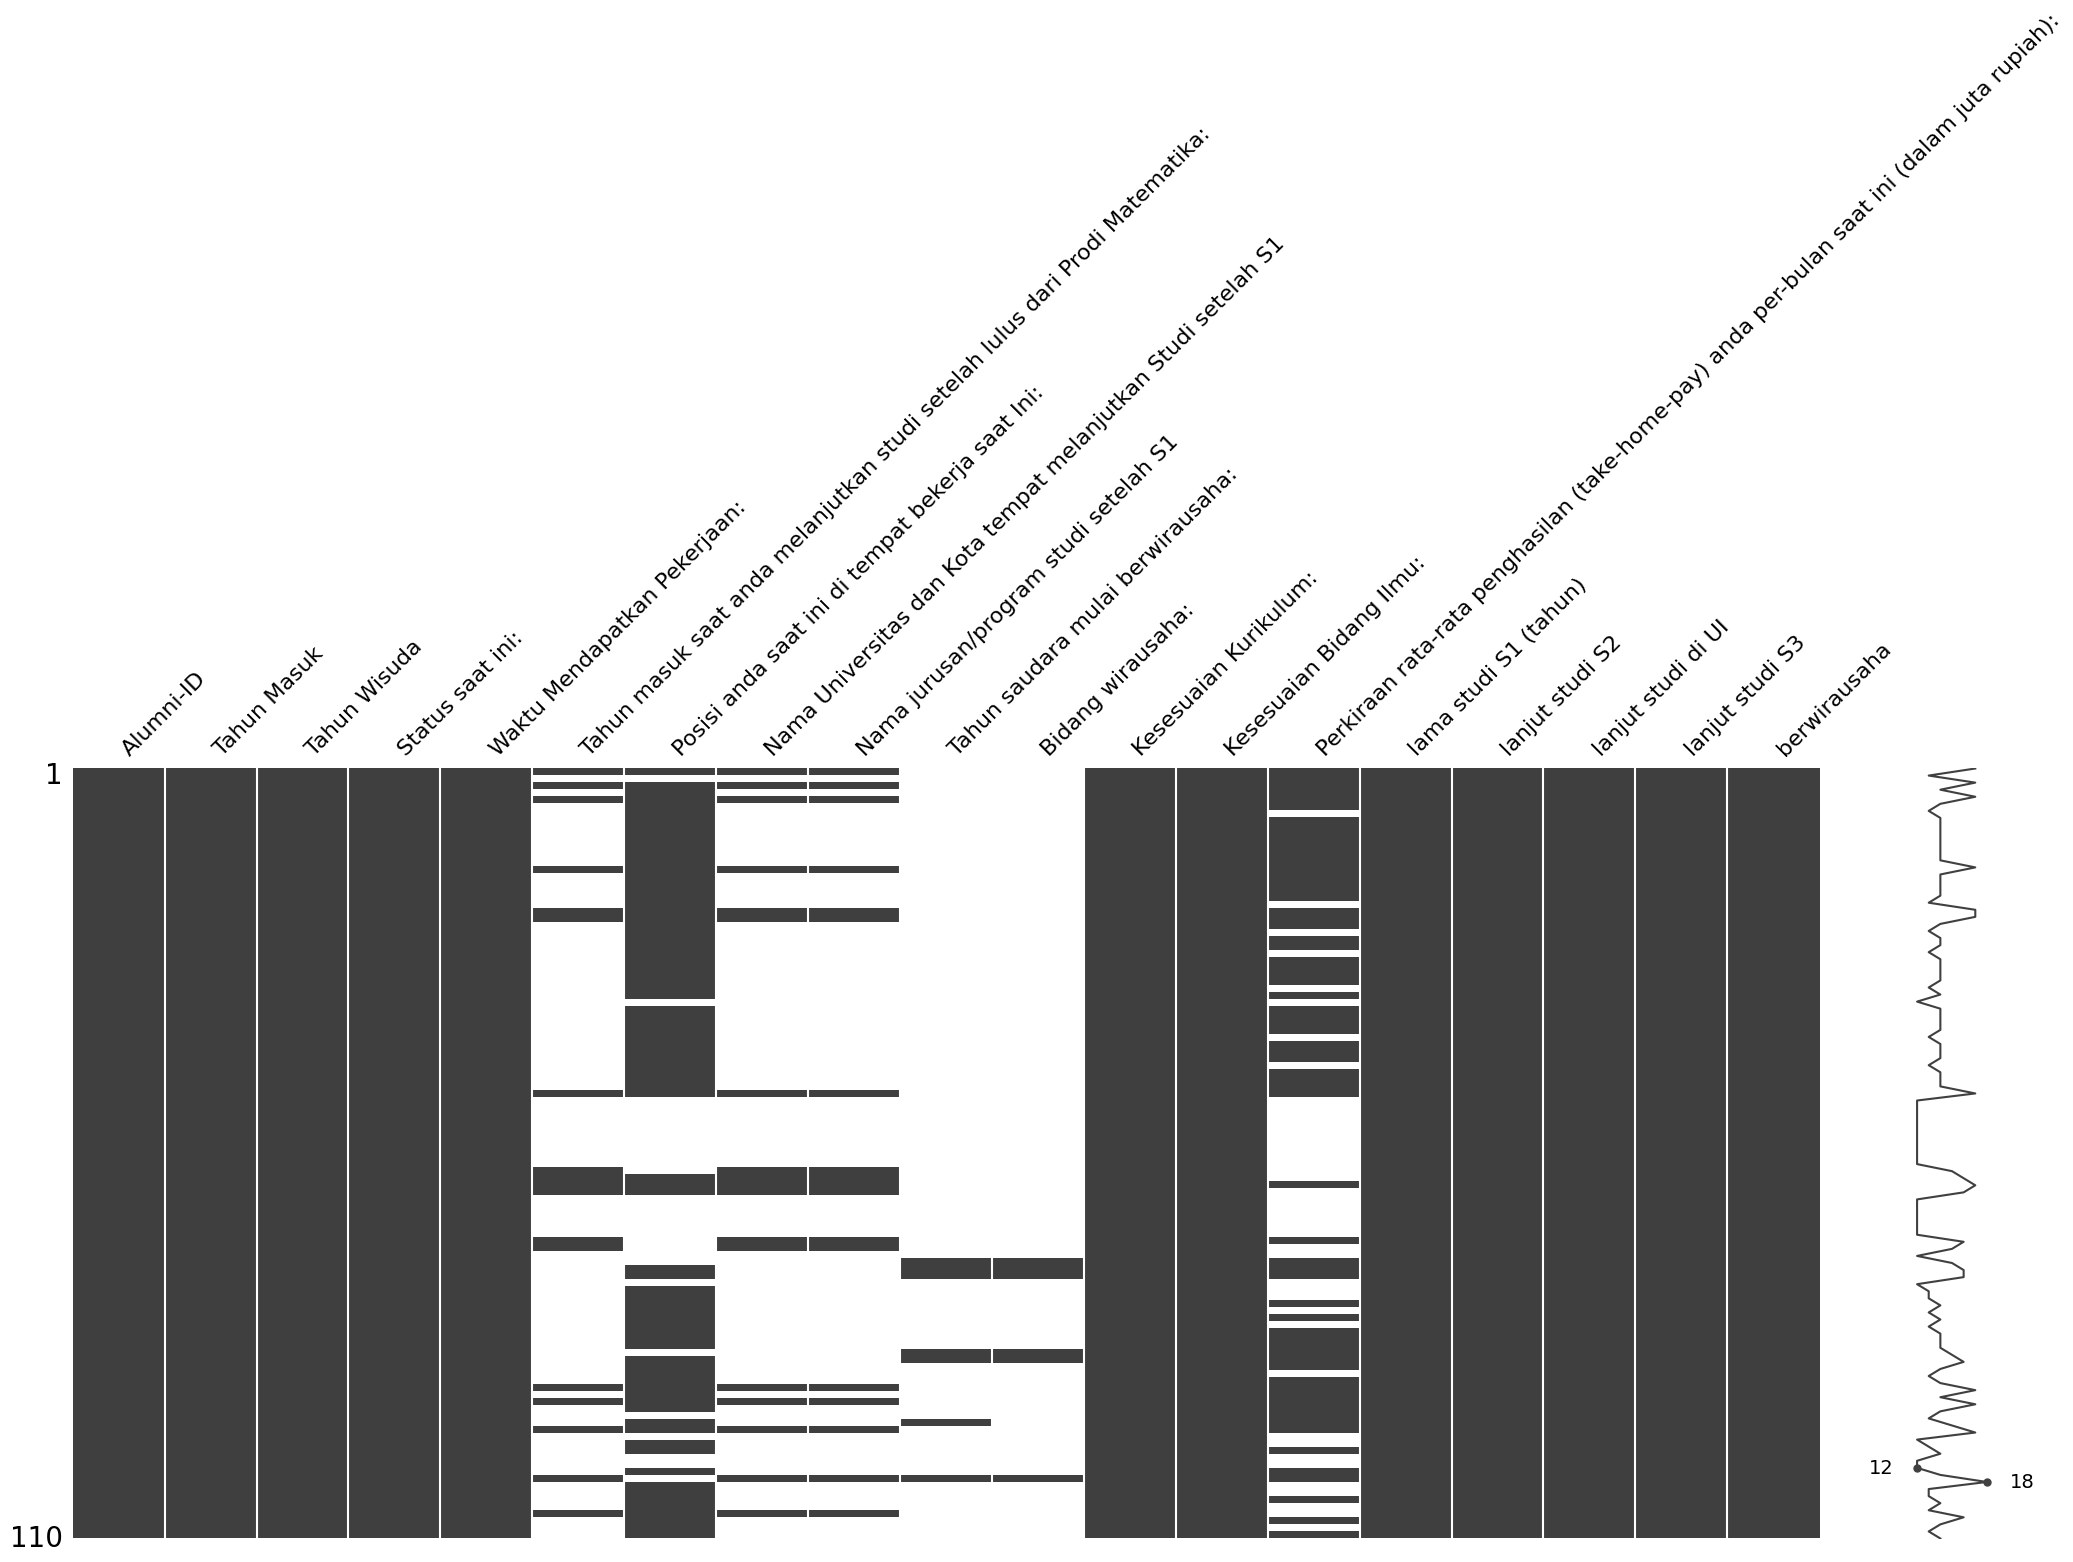

In [ ]:
#handle missing values
msno.matrix(df)
plt.show()

In [ ]:
#persentase missing values
(df.isnull().sum()/len(df)).to_frame('persentase missing values')

,persentase missing values
Alumni-ID,0.000000
Tahun Masuk,0.000000
Tahun Wisuda,0.000000
Status saat ini:,0.000000
Waktu Mendapatkan Pekerjaan:,0.000000
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,0.836364
Posisi anda saat ini di tempat bekerja saat Ini:,0.272727
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,0.836364
Nama jurusan/program studi setelah S1,0.836364
Tahun saudara mulai berwirausaha:,0.936364


- Terdapat banyak sekali missing values pada variabel-variabel tertentu, hal tersebut cukup wajar karena:
  * Kemungkinan beberapa alumni memang tidak melanjutkan studi setelah S1 sehingga kolom "Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:", "Nama Universitas dan Kota tempat melanjutkan Studi setelah S1", dan "Nama jurusan/program studi setelah S1" tidak diisi
  
  * Kemungkinan beberapa alumni juga tidak berwirausaha sehingga kolom "Tahun saudara mulai berwirausaha:" dan "Bidang wirausaha:" tidak diisi.

  * Kemungkinan beberapa alumni juga ada yang belum mendapatkan pekerjaan sehingga kolom "Posisi anda saat ini di tempat bekerja saat Ini:" tidak diisi

  * Karena pertanyaan yang cukup personal, maka beberapa alumni tidak menjawab kolom "Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):"

Selanjutnya, akan dilakukan imputasi sebagai berikut:

In [ ]:
#imputasi
# untuk variabel2 numerik NaN akan diimputasi dengan nilai 0
# untuk variabel2 kategorik NaN akan diimputasi dengan "None"
df['Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:'].fillna(0, inplace=True)
df['Posisi anda saat ini di tempat bekerja saat Ini:'].fillna("None", inplace=True)
df['Nama Universitas dan Kota tempat melanjutkan Studi setelah S1'].fillna("None", inplace=True)
df['Nama jurusan/program studi setelah S1'].fillna("None", inplace=True)
df['Tahun saudara mulai berwirausaha:'].fillna(0, inplace=True)
df['Bidang wirausaha:'].fillna("None", inplace=True)
df['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'].fillna(0, inplace=True)
(df.isnull().sum()/len(df)).to_frame('persentase missing values')

,persentase missing values
Alumni-ID,0.0
Tahun Masuk,0.0
Tahun Wisuda,0.0
Status saat ini:,0.0
Waktu Mendapatkan Pekerjaan:,0.0
Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,0.0
Posisi anda saat ini di tempat bekerja saat Ini:,0.0
Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,0.0
Nama jurusan/program studi setelah S1,0.0
Tahun saudara mulai berwirausaha:,0.0


In [ ]:
#akan dibuat df baru tanpa nilai 0 pada variabel 'Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'
#agar analisis variabel ini dapat lebih akurat
df2 = df[df['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'] != 0]

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                                                                                        Non-Null Count  Dtype  
---  ------                                                                                        --------------  -----  
 0   Alumni-ID                                                                                     66 non-null     int64  
 1   Tahun Masuk                                                                                   66 non-null     float64
 2   Tahun Wisuda                                                                                  66 non-null     float64
 3   Status saat ini:                                                                              66 non-null     object 
 4   Waktu Mendapatkan Pekerjaan:                                                                  66 non-null     object 
 5   Tahun masuk saat anda melanjut

In [ ]:
#statistika deskriptif data df
df.describe()

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Tahun saudara mulai berwirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,lama studi S1 (tahun)
count,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,55.500000,2014.081818,2018.927273,128.418182,3.872727,3.563636,4.587727,4.845455
std,31.898276,4.854076,4.948745,494.857006,0.879002,1.045105,7.903011,0.814844
min,1.000000,2000.000000,2006.000000,0.000000,1.000000,1.000000,0.000000,4.000000
25%,28.250000,2011.250000,2016.250000,0.000000,3.000000,3.000000,0.000000,4.000000
50%,55.500000,2016.000000,2021.000000,0.000000,4.000000,4.000000,4.000000,5.000000
75%,82.750000,2017.000000,2022.750000,0.000000,4.000000,4.000000,6.000000,5.000000
max,110.000000,2019.000000,2023.000000,2023.000000,5.000000,5.000000,65.000000,7.000000


In [ ]:
#statistika deskriptif data df2
df2.describe()

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Tahun saudara mulai berwirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,lama studi S1 (tahun)
count,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000,66.000000
mean,49.378788,2013.090909,2017.893939,214.030303,3.787879,3.393939,7.646212,4.803030
std,34.486905,5.122281,5.189127,626.135153,0.903245,1.121521,8.999497,0.788761
min,1.000000,2000.000000,2006.000000,0.000000,1.000000,1.000000,1.000000,4.000000
25%,18.250000,2009.500000,2015.250000,0.000000,3.000000,3.000000,4.125000,4.000000
50%,40.500000,2015.000000,2020.000000,0.000000,4.000000,3.000000,6.000000,5.000000
75%,83.750000,2017.000000,2022.000000,0.000000,4.000000,4.000000,7.000000,5.000000
max,110.000000,2019.000000,2023.000000,2023.000000,5.000000,5.000000,65.000000,7.000000


Tidak terdapat kejanggalan pada data dan sudah tidak terdapat missing values

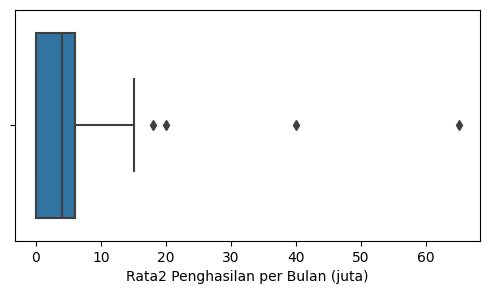

In [ ]:
#cek outlier rata2 penghasilan per bulan data df
plt.figure(figsize=(6, 3))
sns.boxplot(x=df['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'])
plt.xlabel('Rata2 Penghasilan per Bulan (juta)')
plt.show()

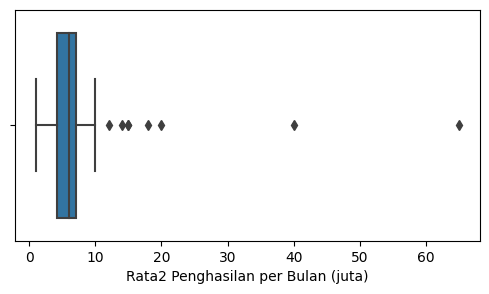

In [ ]:
#cek outlier rata2 penghasilan per bulan data df2
plt.figure(figsize=(6, 3))
sns.boxplot(x=df2['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'])
plt.xlabel('Rata2 Penghasilan per Bulan (juta)')
plt.show()

<ipython-input-213-9f38045912c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(df['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'], kde=True, rug=True)


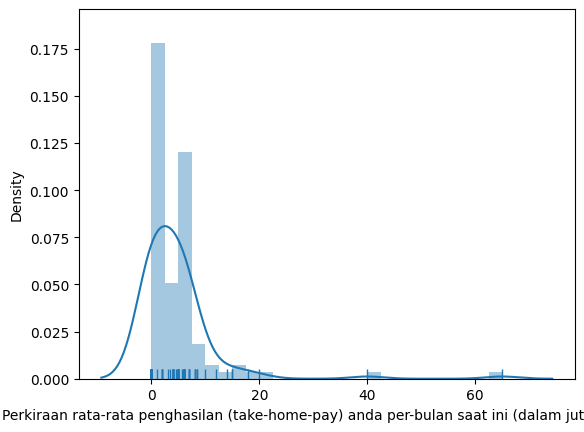

In [ ]:
#Melihat rata2 penghasilan per bulan berdistribusi normal atau tidak dari data df
p = sns.distplot(df['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'], kde=True, rug=True)

<ipython-input-214-4760402cfec1>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(df2['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'], kde=True, rug=True)


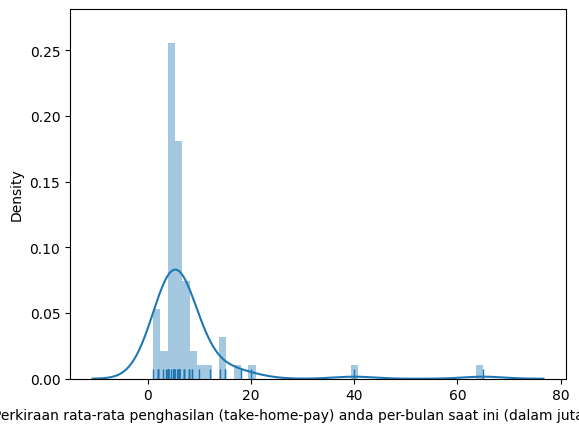

In [ ]:
#Melihat rata2 penghasilan per bulan berdistribusi normal atau tidak dari data df2
p = sns.distplot(df2['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'], kde=True, rug=True)

Terdapat beberapa outlier yang memang wajar sehingga tidak masalah dan distribusi dari variabel masih terbilang normal.

In [ ]:
#mengubah tipe data df
df['Tahun saudara mulai berwirausaha:'] = df['Tahun saudara mulai berwirausaha:'].astype(int)
df['Bidang wirausaha:'] = df["Bidang wirausaha:"].astype(str)
df=df.astype({"lanjut studi S2":"category","lanjut studi di UI":"category","lanjut studi S3":"category","Kesesuaian Bidang Ilmu:":"category","Kesesuaian Kurikulum:":"category","Waktu Mendapatkan Pekerjaan:":"category","Status saat ini:":"category","berwirausaha":"category"})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                                                                                        Non-Null Count  Dtype   
---  ------                                                                                        --------------  -----   
 0   Alumni-ID                                                                                     110 non-null    int64   
 1   Tahun Masuk                                                                                   110 non-null    float64 
 2   Tahun Wisuda                                                                                  110 non-null    float64 
 3   Status saat ini:                                                                              110 non-null    category
 4   Waktu Mendapatkan Pekerjaan:                                                                  110 non-null    category
 5   Tahun masuk saat anda 

In [ ]:
#mengubah tipe data df2
df2['Tahun saudara mulai berwirausaha:'] = df2['Tahun saudara mulai berwirausaha:'].astype(int)
df2['Bidang wirausaha:'] = df2["Bidang wirausaha:"].astype(str)
df2=df2.astype({"lanjut studi S2":"category","lanjut studi di UI":"category","lanjut studi S3":"category","Kesesuaian Bidang Ilmu:":"category","Kesesuaian Kurikulum:":"category","Waktu Mendapatkan Pekerjaan:":"category","Status saat ini:":"category","berwirausaha":"category"})
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 109
Data columns (total 19 columns):
 #   Column                                                                                        Non-Null Count  Dtype   
---  ------                                                                                        --------------  -----   
 0   Alumni-ID                                                                                     66 non-null     int64   
 1   Tahun Masuk                                                                                   66 non-null     float64 
 2   Tahun Wisuda                                                                                  66 non-null     float64 
 3   Status saat ini:                                                                              66 non-null     category
 4   Waktu Mendapatkan Pekerjaan:                                                                  66 non-null     category
 5   Tahun masuk saat anda m

<ipython-input-216-ca0bebbef385>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Tahun saudara mulai berwirausaha:'] = df2['Tahun saudara mulai berwirausaha:'].astype(int)
<ipython-input-216-ca0bebbef385>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Bidang wirausaha:'] = df2["Bidang wirausaha:"].astype(str)


## EDA

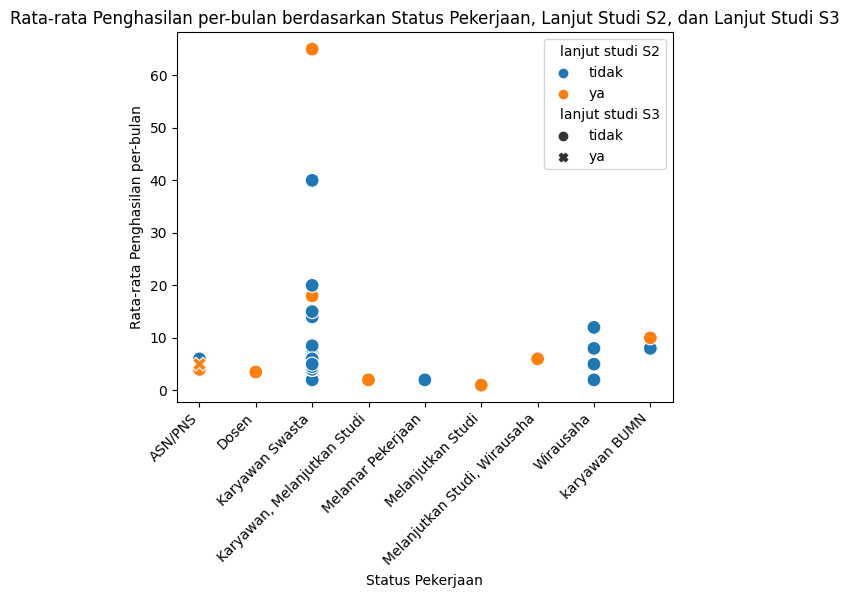

In [ ]:
#melihat rata2 penghasilan berdasarkan status pekerjaan, lanjut studi s2, dan lanjut studi s3
#akan digunakan df2, yaitu tanpa rata2 penghasilan 0
sns.scatterplot(x='Status saat ini:', y='Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):', hue='lanjut studi S2', style='lanjut studi S3', data=df2, s=100)

plt.title('Rata-rata Penghasilan per-bulan berdasarkan Status Pekerjaan, Lanjut Studi S2, dan Lanjut Studi S3')
plt.xlabel('Status Pekerjaan')
plt.ylabel('Rata-rata Penghasilan per-bulan')
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
df[df["lanjut studi S3"] == 'ya']

,Alumni-ID,Tahun Masuk,Tahun Wisuda,Status saat ini:,Waktu Mendapatkan Pekerjaan:,Tahun masuk saat anda melanjutkan studi setelah lulus dari Prodi Matematika:,Posisi anda saat ini di tempat bekerja saat Ini:,Nama Universitas dan Kota tempat melanjutkan Studi setelah S1,Nama jurusan/program studi setelah S1,Tahun saudara mulai berwirausaha:,Bidang wirausaha:,Kesesuaian Kurikulum:,Kesesuaian Bidang Ilmu:,Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):,lama studi S1 (tahun),lanjut studi S2,lanjut studi di UI,lanjut studi S3,berwirausaha
2,3,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,dosen,s2 ui dan s3 ipb,magister teknologi informasi dan doktoral ilmu...,0,None,5.0,5.0,5.0,6.0,ya,ya,ya,tidak


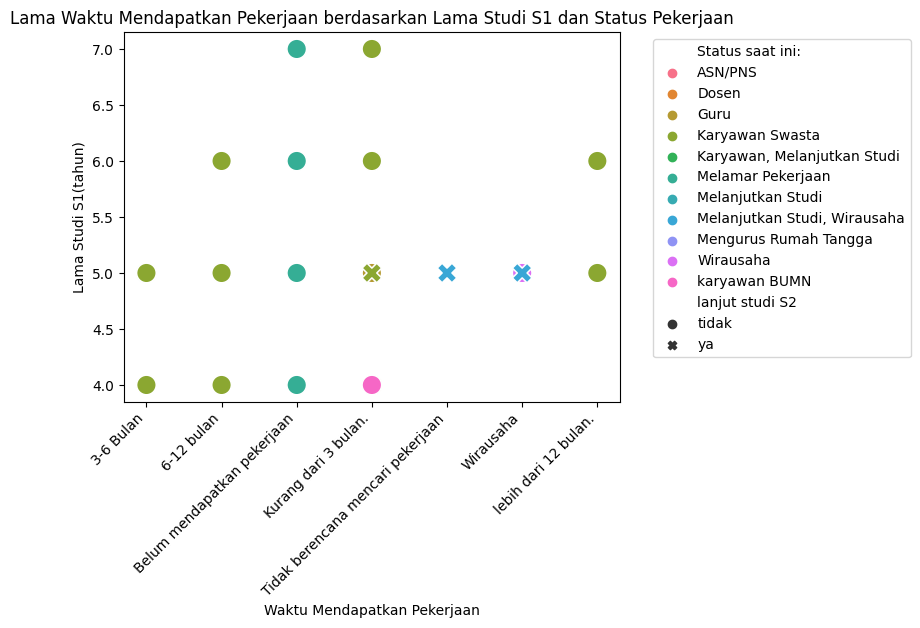

In [ ]:
#melihat lawan waktu mendapatkan pekerjaan berdasarkan lama studi S1 dan status pekerjaan
sns.scatterplot(x='Waktu Mendapatkan Pekerjaan:', y='lama studi S1 (tahun)',  hue='Status saat ini:',style="lanjut studi S2", data=df, s=200)

plt.title('Lama Waktu Mendapatkan Pekerjaan berdasarkan Lama Studi S1 dan Status Pekerjaan')
plt.legend(loc='upper right', bbox_to_anchor=(1.6, 1))
plt.xlabel('Waktu Mendapatkan Pekerjaan')
plt.ylabel('Lama Studi S1(tahun)')
plt.xticks(rotation=45, ha='right')
plt.show()

# REGRESI LINIER SEDERHANA

<ipython-input-220-d0a6a7ffef12>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(df2.corr())
<ipython-input-220-d0a6a7ffef12>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={'size':5}, square=True)


                                                    Alumni-ID  Tahun Masuk  \
Alumni-ID                                            1.000000    -0.091207   
Tahun Masuk                                         -0.091207     1.000000   
Tahun Wisuda                                        -0.085740     0.988381   
Tahun saudara mulai berwirausaha:                    0.338412    -0.092786   
Perkiraan rata-rata penghasilan (take-home-pay)...  -0.124843    -0.164325   
lama studi S1 (tahun)                                0.028236     0.008308   

                                                    Tahun Wisuda  \
Alumni-ID                                              -0.085740   
Tahun Masuk                                             0.988381   
Tahun Wisuda                                            1.000000   
Tahun saudara mulai berwirausaha:                      -0.116633   
Perkiraan rata-rata penghasilan (take-home-pay)...     -0.179586   
lama studi S1 (tahun)                        

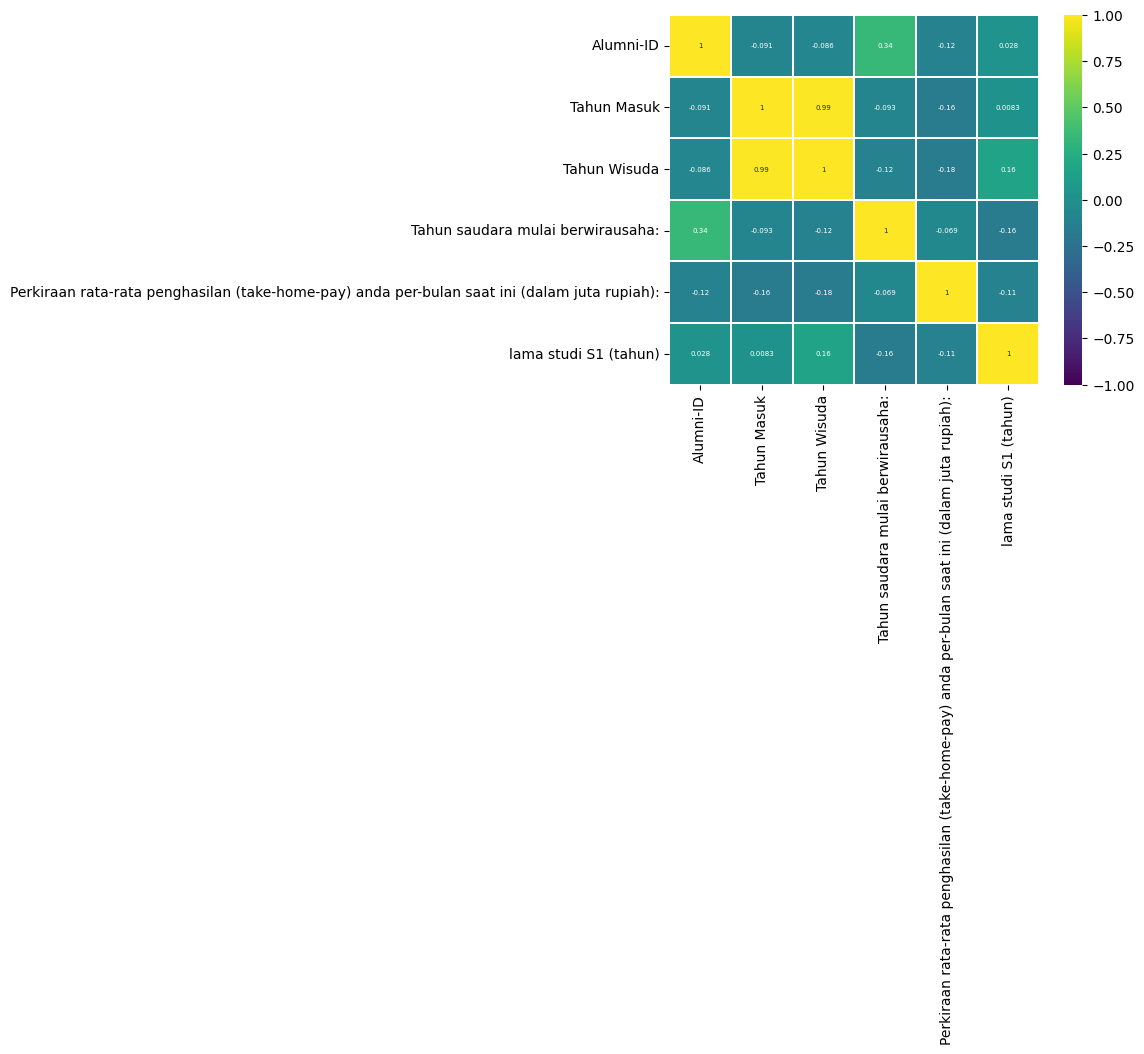

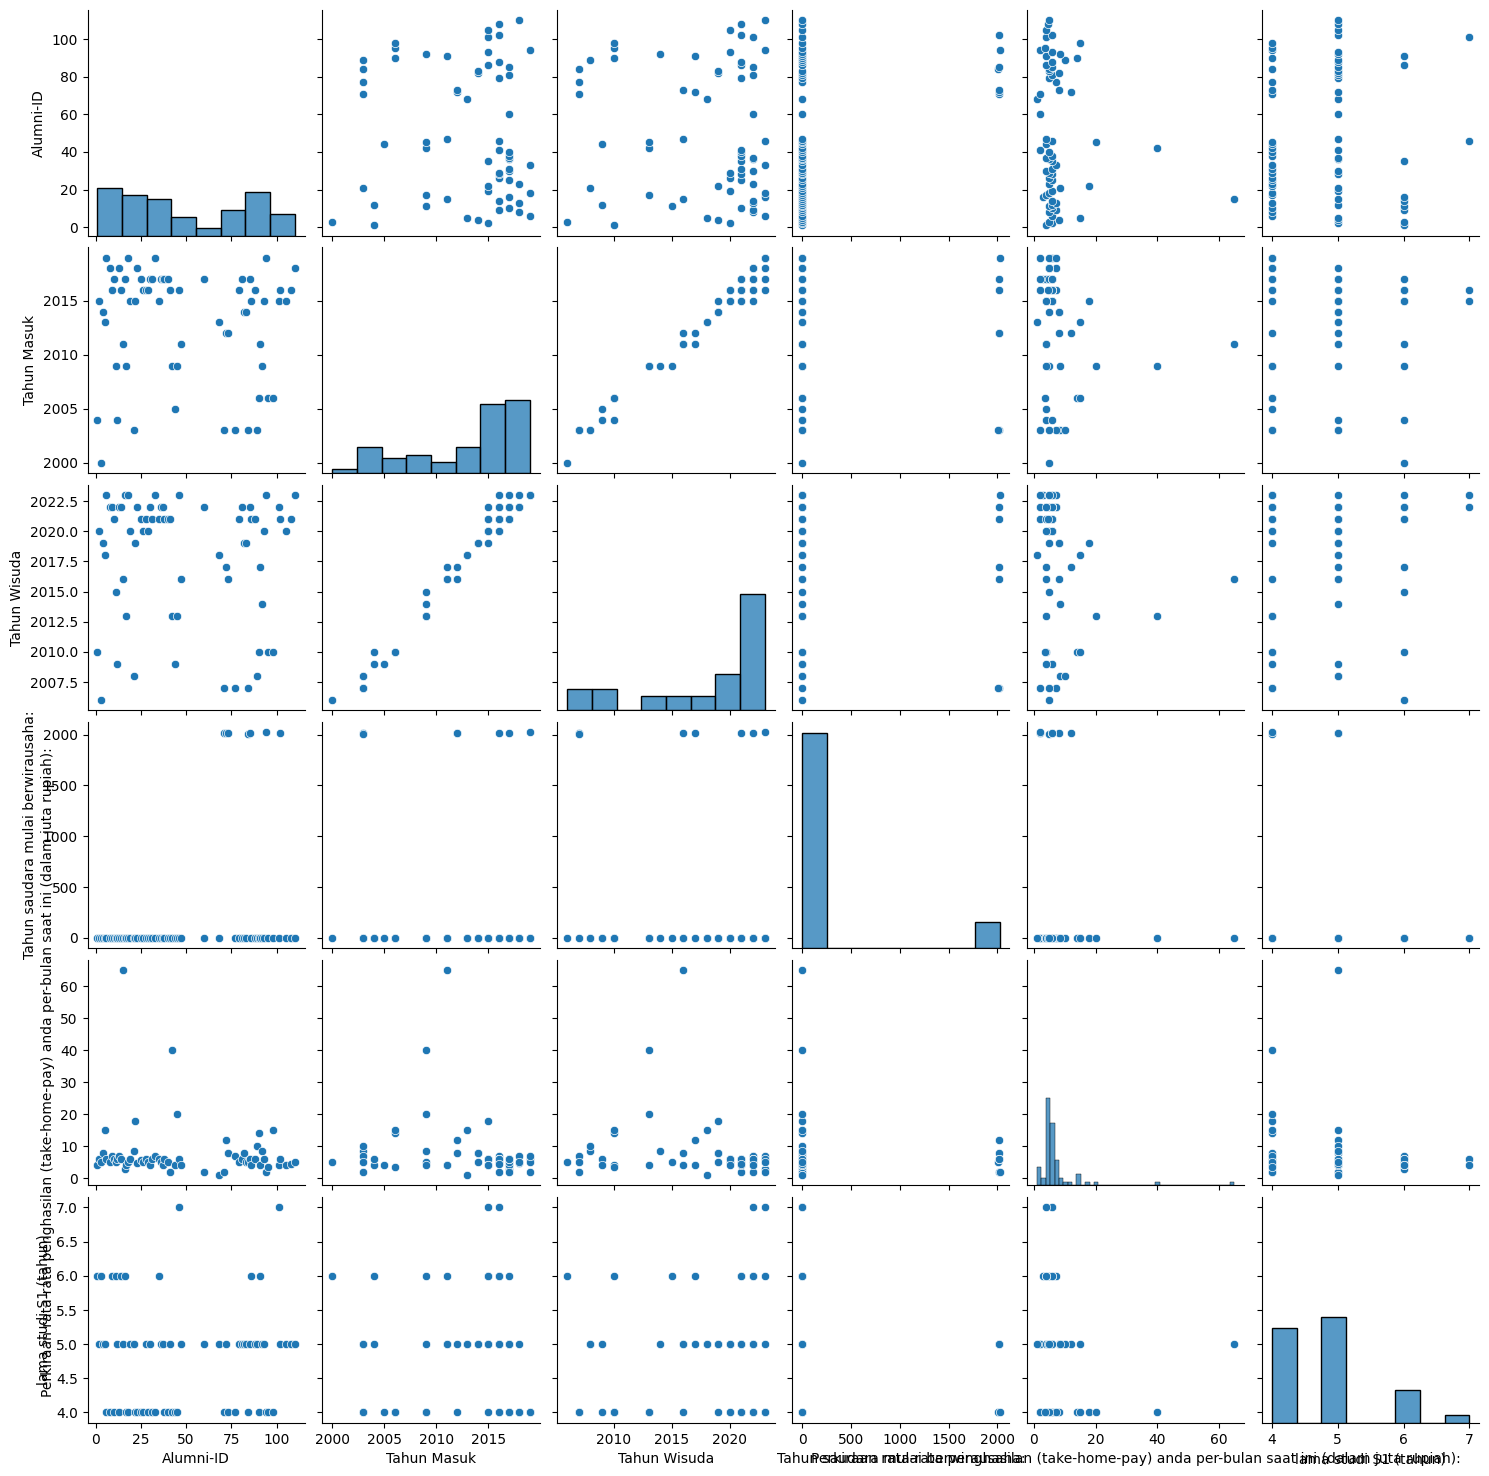

In [ ]:
#mengecek multikolinearitas
print(df2.corr())
sns.heatmap(df2.corr(), cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1, annot=True, annot_kws={'size':5}, square=True)
p = sns.pairplot(df2)

In [ ]:
#VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
df_num = df2.select_dtypes(include = ('int64', 'float64'))

X = df_num.drop(columns=['Perkiraan rata-rata penghasilan (take-home-pay) anda per-bulan saat ini (dalam juta rupiah):'])
vif_data = pd.DataFrame()
vif_data["Variabel"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                            Variabel       VIF
0                          Alumni-ID  3.507962
1                        Tahun Masuk       inf
2                       Tahun Wisuda       inf
3  Tahun saudara mulai berwirausaha:  1.307812
4              lama studi S1 (tahun)       inf


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


Jika nilai VIF < 10, maka dinyatakan tidak terjadi multikolinearitas.

Pada variabel lama studi S1 (tahun) terdapat nilai VIF yang sangat tinggi, tetapi dari matriks korelasi tidak terlihat adanya korelasi yang kuat sehingga diasumsikan tidak terjadi multikolinearitas.

In [ ]:
#normalisasi nama  kolom  agar tidak terjadi error saat membuat model
df_new_name = pd.DataFrame.copy(df2)
df_new_name.columns = df_new_name.columns.str.replace(' ', '_')
df_new_name.columns = df_new_name.columns.str.replace(':', '')
df_new_name.columns = df_new_name.columns.str.replace('(', '')
df_new_name.columns = df_new_name.columns.str.replace(')', '')
df_new_name.columns = df_new_name.columns.str.replace('-', '_')
df_new_name.columns = df_new_name.columns.str.replace('/', '_')
df_new_name.head()

<ipython-input-222-a6e3c22f3b66>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new_name.columns = df_new_name.columns.str.replace('(', '')
<ipython-input-222-a6e3c22f3b66>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_new_name.columns = df_new_name.columns.str.replace(')', '')


,Alumni_ID,Tahun_Masuk,Tahun_Wisuda,Status_saat_ini,Waktu_Mendapatkan_Pekerjaan,Tahun_masuk_saat_anda_melanjutkan_studi_setelah_lulus_dari_Prodi_Matematika,Posisi_anda_saat_ini_di_tempat_bekerja_saat_Ini,Nama_Universitas_dan_Kota_tempat_melanjutkan_Studi_setelah_S1,Nama_jurusan_program_studi_setelah_S1,Tahun_saudara_mulai_berwirausaha,Bidang_wirausaha,Kesesuaian_Kurikulum,Kesesuaian_Bidang_Ilmu,Perkiraan_rata_rata_penghasilan_take_home_pay_anda_per_bulan_saat_ini_dalam_juta_rupiah,lama_studi_S1_tahun,lanjut_studi_S2,lanjut_studi_di_UI,lanjut_studi_S3,berwirausaha
0,1,2004.0,2010.0,ASN/PNS,Kurang dari 3 bulan.,2014,guru kelas,universitas terbuka,pendidikan guru sekolah dasar,0,None,3.0,3.0,4.0,6.0,ya,tidak,tidak,tidak
1,2,2015.0,2020.0,ASN/PNS,6-12 bulan,0,None,None,None,0,None,3.0,3.0,6.0,5.0,tidak,tidak,tidak,tidak
2,3,2000.0,2006.0,ASN/PNS,Kurang dari 3 bulan.,S2 2008 dan S3 2020,dosen,s2 ui dan s3 ipb,magister teknologi informasi dan doktoral ilmu...,0,None,5.0,5.0,5.0,6.0,ya,ya,ya,tidak
3,4,2014.0,2019.0,karyawan BUMN,6-12 bulan,0,officer hc solution analysis support,None,None,0,None,3.0,3.0,8.0,5.0,tidak,tidak,tidak,tidak
4,5,2013.0,2018.0,Karyawan Swasta,Kurang dari 3 bulan.,2021,control tower,its - surabaya,supply chain,0,None,4.0,3.0,15.0,5.0,ya,tidak,tidak,tidak


In [ ]:
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import statsmodels.api as sm, scipy.stats as stats

model = ols(formula = "Perkiraan_rata_rata_penghasilan_take_home_pay_anda_per_bulan_saat_ini_dalam_juta_rupiah~ C(lanjut_studi_S2) + lama_studi_S1_tahun + C(lanjut_studi_di_UI)", data=df_new_name).fit()
print(model.summary())

                                                               OLS Regression Results                                                              
Dep. Variable:     Perkiraan_rata_rata_penghasilan_take_home_pay_anda_per_bulan_saat_ini_dalam_juta_rupiah   R-squared:                       0.335
Model:                                                                                                 OLS   Adj. R-squared:                  0.303
Method:                                                                                      Least Squares   F-statistic:                     10.41
Date:                                                                                     Thu, 26 Oct 2023   Prob (F-statistic):           1.22e-05
Time:                                                                                             07:55:36   Log-Likelihood:                -224.70
No. Observations:                                                                                       66   AIC

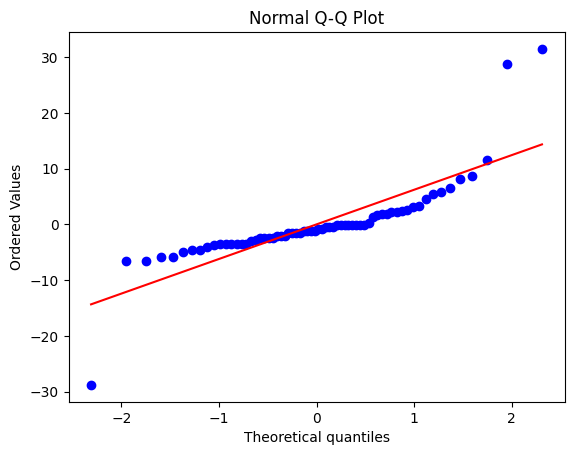

In [ ]:
#normalitas
stats.probplot(model.resid, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot")
plt.show()

* Tidak terdapat multikolinearitas
* Nilai durbin watson mendekati 2 berarti tidak terdapat auto korelasi
* Dari normal qq plot terlihat residual cukup berdistribusi normal

Sehingga asumsi model regresi terpenuhi

Dan p-value dari F-statistic =  1.22e-05 < 0.05 yang berarti model signifikan, walaupun terdapat beberapa variabel yang tidak signifikan jika diuji terpisah


Sehingga model dapat diinterpretasikan:
* Alumni yang lanjut studi S2 akan meningkatkan rata-rata penghasilan bulanan sebesar 0.7712 kali dibanding yang tidak
* Alumni yang lanjut studi di UI akan meningkatkan rata-rata penghasilan bulanan sebesar 29.2817 kali dibanding yang tidak
* Kenaikan lama studi S1 sebesar 1 tahun akan menurunkan rata-rata penghasilan bulanan sebesar 2.3816 kali